In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

# Task 1

In [2]:
train = pd.DataFrame.from_csv('/Users/albertzhang/Desktop/18spring/AML/HW/HW_5/hw5_data_train.csv',index_col=None).dropna()
test = pd.DataFrame.from_csv('/Users/albertzhang/Desktop/18spring/AML/HW/HW_5/hw5_data_test.csv',index_col=None).dropna()

y_train = train['Recommended']
y_test = test['Recommended']

#1) Use the title only
vect = CountVectorizer()
title_train = vect.fit_transform(train['Title'])
name1 = vect.get_feature_names()

#2) Use the review body only
vect = CountVectorizer()
review_train = vect.fit_transform(train['Review'])
name2 = vect.get_feature_names()

#3) Concatenate the title and review to a single text and analyze that (discarding the information which words were in the title and which in the body)
vect = CountVectorizer()
titleReview_train = vect.fit_transform(train['Title'].map(str) + ' ' + train['Review'])
name3 = vect.get_feature_names()
titleReview_test = test['Title'].map(str) + ' ' + test['Review']

#4) Vectorizing title and review individually and concatenating the vector representations.
vect1 = CountVectorizer()
vect2 = CountVectorizer()
title_review_train = hstack((vect1.fit_transform(train['Title']),vect2.fit_transform(train['Review'])))
name4 = name1 + name2


/Users/albertzhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.
/Users/albertzhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [176]:
pipe1 = make_pipeline(CountVectorizer(), LogisticRegression())
print('#1 Title Only cross validation score:\n{}'.format(np.mean(cross_val_score(LogisticRegression(), title_train, y_train, cv=5, scoring='roc_auc'))))

pipe2 = make_pipeline(CountVectorizer(), LogisticRegression())
print('#2 Review Only cross validation score:\n{}'.format(np.mean(cross_val_score(LogisticRegression(), review_train, y_train, cv=5, scoring='roc_auc'))))

pipe3 = make_pipeline(CountVectorizer(), LogisticRegression())
print('#3 Concatenate Title and Review cross validation score:\n{}'.format(np.mean(cross_val_score(LogisticRegression(), titleReview_train, y_train, cv=5, scoring='roc_auc'))))

print('#4 Concatenate Title and Review Vectors cross validation score:\n{}'.format(np.mean(cross_val_score(LogisticRegression(), title_review_train, y_train, cv=5, scoring='roc_auc'))))

#1 Title Only cross validation score:
0.920447284709158
#2 Review Only cross validation score:
0.9119736515693934
#3 Concatenate Title and Review cross validation score:
0.933310639278875
#4 Concatenate Title and Review Vectors cross validation score:
0.9383480297268004


In [24]:
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

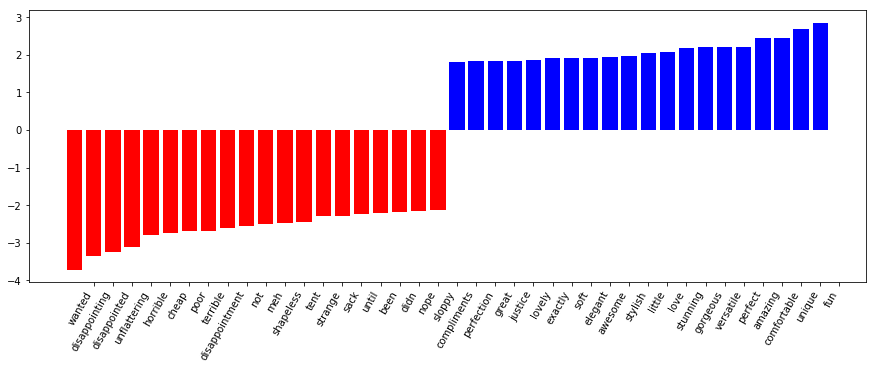

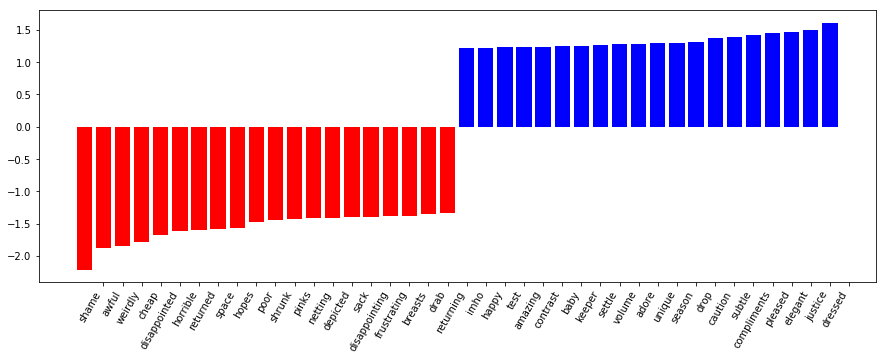

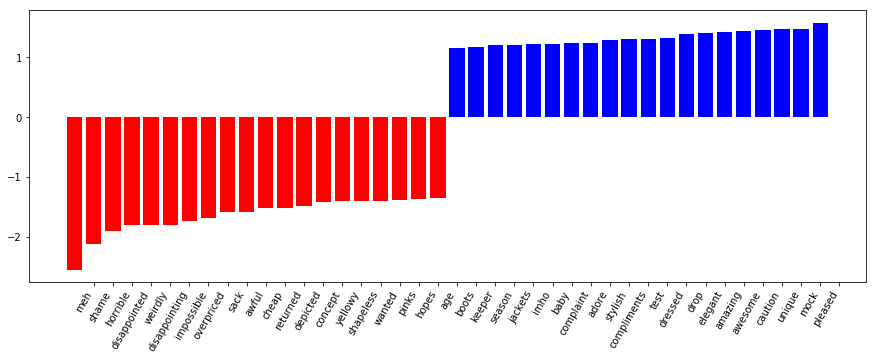

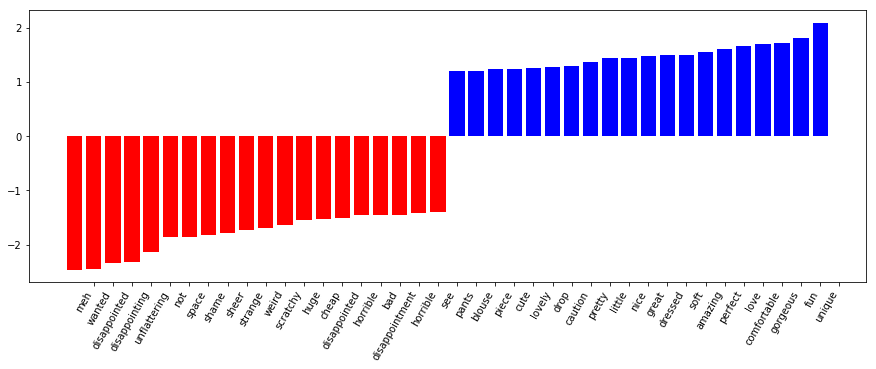

In [182]:
xList=[title_train, review_train, titleReview_train, title_review_train]
names=[name1,name2,name3,name4]

for i in range(4):
    lr = LogisticRegression()
    lr.fit(xList[i], y_train)
    plot_coefficients(lr, names[i])
    i = i + 1

## GridSearch to tune the regularization parameter

In [301]:
y_train = train['Recommended']
y_test = test['Recommended']

#1) Use the title only
title_train = train['Title']
title_test = test['Title']

#2) Use the review body only
review_train = train['Review']
review_test = test['Review']

#3) Concatenate the title and review to a single text and analyze that (discarding the information which words were in the title and which in the body)
titleReview_train = train['Title'].map(str) + ' ' + train['Review']
titleReview_test = test['Title'].map(str) + ' ' + test['Review']

#4) Vectorizing title and review individually and concatenating the vector representations.
vect1 = CountVectorizer()
vect2 = CountVectorizer()
title_review_train = hstack((vect1.fit_transform(train['Title']),vect2.fit_transform(train['Review'])))
title_review_test = hstack((vect1.transform(test['Title']),vect2.transform(test['Review'])))

In [303]:
grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(CountVectorizer(),LogisticRegression())
gs = GridSearchCV(pipe, grid, scoring='roc_auc', cv=5)
gs.fit(title_train, y_train)
print ('#1 best_parameter_:', gs.best_params_)
print ('#1 best_cv_score_:', gs.best_score_)
print ('#1 predict_score_:', gs.score(title_test, y_test))

grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(CountVectorizer(),LogisticRegression())
gs = GridSearchCV(pipe, grid, scoring='roc_auc', cv=5)
gs.fit(review_train, y_train)
print ('#2 best_parameter_:', gs.best_params_)
print ('#2 best_cv_score_:', gs.best_score_)
print ('#2 predict_score_:', gs.score(review_test, y_test))

grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(CountVectorizer(),LogisticRegression())
gs = GridSearchCV(pipe, grid, scoring='roc_auc', cv=5)
gs.fit(titleReview_train, y_train)
print ('#3 best_parameter_:', gs.best_params_)
print ('#3 best_cv_score_:', gs.best_score_)
print ('#3 predict_score_:', gs.score(titleReview_test, y_test))

grid = {'C': [0.01, 0.1, 1, 10, 100]}
lr = LogisticRegression()
gs = GridSearchCV(lr, grid, scoring='roc_auc', cv=5)
gs.fit(title_review_train, y_train)
print ('#4 best_parameter_:', gs.best_params_)
print ('#4 best_score_:', gs.best_score_)
print ('#4 predict_score_:', gs.score(title_review_test, y_test))

#1 best_parameter_: {'logisticregression__C': 1}
#1 best_cv_score_: 0.9204469952584714
#1 predict_score_: 0.9214984071094153
#2 best_parameter_: {'logisticregression__C': 0.1}
#2 best_cv_score_: 0.923761847972498
#2 predict_score_: 0.9221422856845667
#3 best_parameter_: {'logisticregression__C': 0.1}
#3 best_cv_score_: 0.942410344658611
#3 predict_score_: 0.9388955774186873
#4 best_parameter_: {'C': 0.1}
#4 best_score_: 0.9436032417207872
#4 predict_score_: 0.9431204167740951


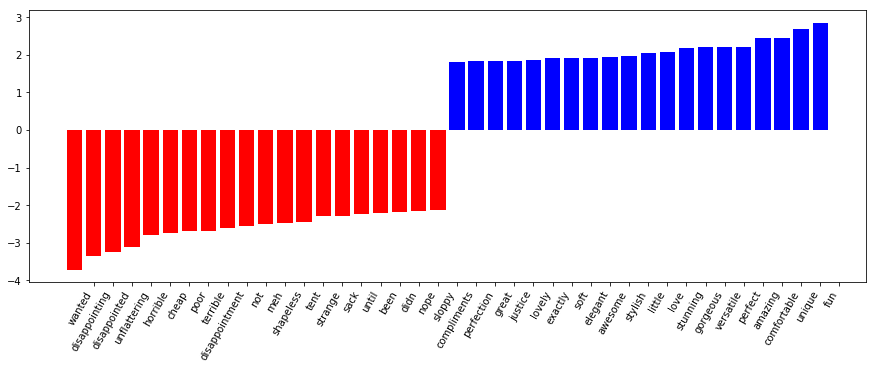

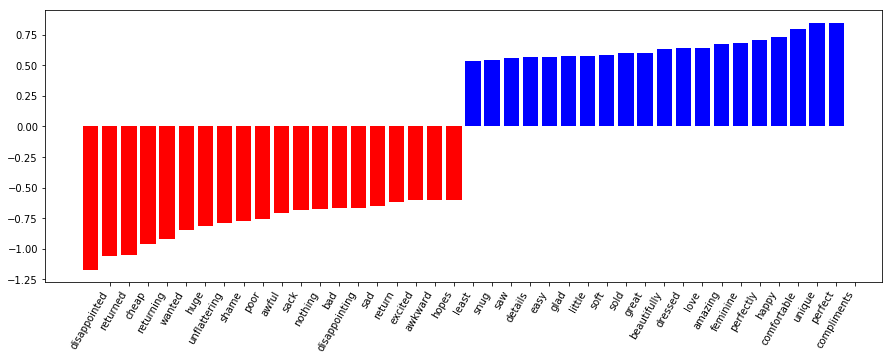

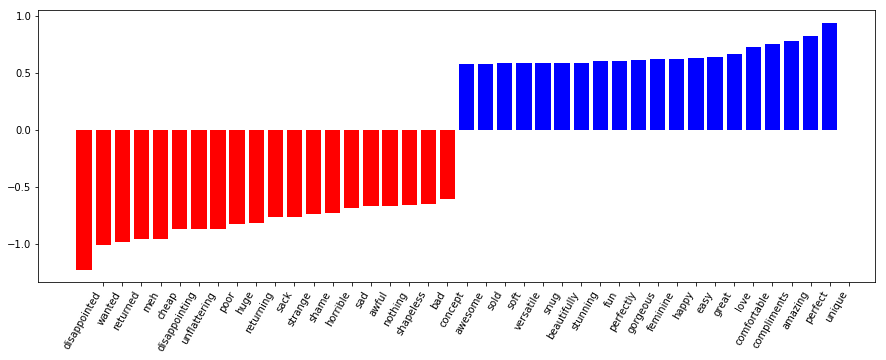

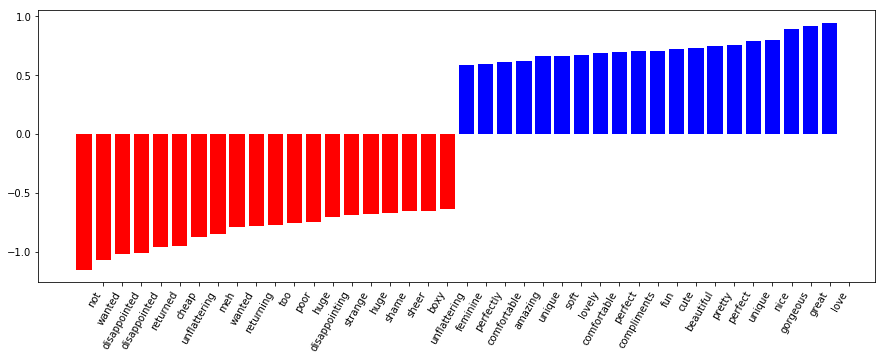

In [184]:
xList=[title_train, review_train, titleReview_train, title_review_train]
names=[name1,name2,name3,name4]
params=[1,0.1,0.1,0.1]

for i in range(4):
    lr = LogisticRegression(C=params[i])
    lr.fit(xList[i], y_train)
    plot_coefficients(lr, names[i])
    i = i + 1

### Based on the above results, the fourth way is best. 

# Task 3.1 

In [268]:
X_train = train['Title'].map(str) + ' ' + train['Review']

In [271]:
pipe1 = make_pipeline(TfidfVectorizer(ngram_range=(1, 1)),LogisticRegressionCV(), memory='cache_folder')
print(' unigrams score: {}'.format(np.mean(cross_val_score(pipe1, X_train , y_train, cv=5, scoring='roc_auc'))))

tfidf = TfidfVectorizer(ngram_range=(1, 4))
titleReview_train_tfidf = tfidf.fit_transform(train['Title'].map(str) + ' ' + train['Review'])
name = tfidf.get_feature_names()
pipe3 = make_pipeline(TfidfVectorizer(ngram_range=(1, 4)),LogisticRegressionCV(), memory='cache_folder')
print('(1, 4)grams score: {}'.format(np.mean(cross_val_score(pipe3, X_train, y_train, cv=5, scoring='roc_auc'))))


 unigrams score: 0.9467156329833519
(1, 4)grams score: 0.9563276559749114


Thus, n-grams(here 4-grams) of varying length will give a best performance.

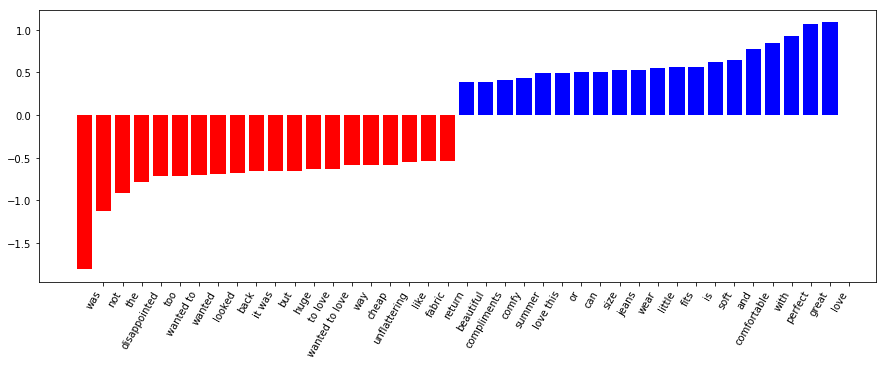

In [207]:
tfidf = TfidfVectorizer(ngram_range=(1, 4))
titleReview_train_tfidf = tfidf.fit_transform(train['Title'].map(str) + ' ' + train['Review'])
name = tfidf.get_feature_names()

lr = LogisticRegression(C=0.1)
lr.fit(titleReview_train_tfidf, y_train)
plot_coefficients(lr, name)

### Draw only non-unigrams

In [22]:
def plot_higher_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    ngrams_name=[]
    ngrams_coef=[]
    for name in feature_names:
        if len(name.split())>1:
            ngrams_name.append(True)
        else:
            ngrams_name.append(False)        
    for i in range(len(feature_names)):
        if ngrams_name[i]==True:
            ngrams_coef.append(coef[i])
        else:
            ngrams_coef.append(0)
        
    ngrams_coef = np.asarray(ngrams_coef)
    
    top_positive_coefficients = np.argsort(ngrams_coef)[-top_features:]
    top_negative_coefficients = np.argsort(ngrams_coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

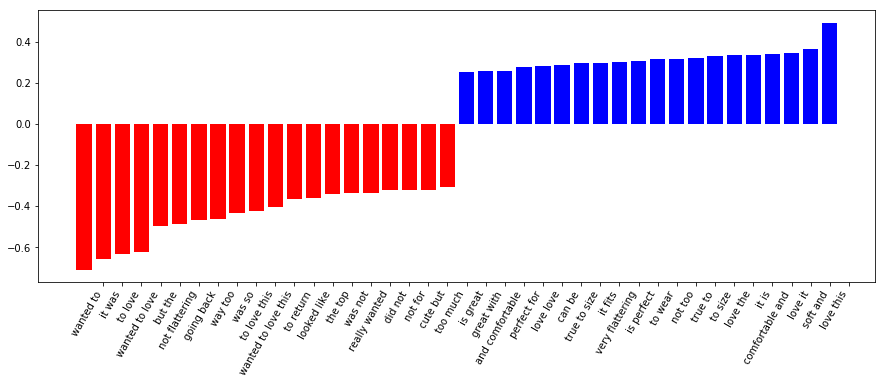

In [242]:
tfidf = TfidfVectorizer(ngram_range=(1, 4))
titleReview_train_tfidf = tfidf.fit_transform(train['Title'].map(str) + ' ' + train['Review'])
name = tfidf.get_feature_names()

lr = LogisticRegression(C=0.1)
lr.fit(titleReview_train_tfidf, y_train)
plot_higher_coefficients(lr, name)

# Task 3.2

In [20]:
tfidf = TfidfVectorizer(ngram_range=(1, 3), analyzer="char_wb")
titleReview_train_tfidf = tfidf.fit_transform(train['Title'].map(str) + ' ' + train['Review'])
titleReview_test_tfidf = tfidf.transform(test['Title'].map(str) + ' ' + test['Review'])
name = tfidf.get_feature_names()

Using character n-grams test score: 0.8172196214125789


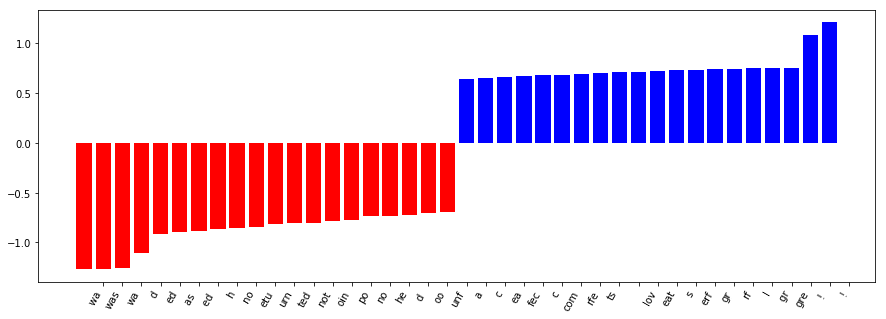

In [25]:
lr = LogisticRegression(C=0.1)
lr.fit(titleReview_train_tfidf, y_train)
print('Using character n-grams test score: {}'.format(lr.score(titleReview_test_tfidf,y_test)))
plot_coefficients(lr, name)

From the plot, we can tell that:

1.reviews or titles that have '!' in content, will lead to a recommendation.

2.reviews or titles that have 'was'-like words(such as 'wa' and 'was') in content, will not lead to a recommendation.

3.reviews or titles that have 'no'-like words(such as 'no' and 'not') in content, will not lead to a recommendation.

4.character n-grams's performance is worse than same n-grams of words.

# Task 3.3

### impact of min_df with n-grams

In [26]:
X_train = train['Title'].map(str) + ' ' + train['Review']
X_test = test['Title'].map(str) + ' ' + test['Review']

In [29]:
pipe = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), min_df=2), LogisticRegressionCV())
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=2)
tfidf.fit(X_train,y_train)
print('(1, 2), min_df=2: {}'.format(len(tfidf.vocabulary_)))
print('(1, 2), min_df=2 score: {}'.format(np.mean(cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc'))))
print('(1, 2), min_df=2 test score: {}'.format(pipe.fit(X_train,y_train).score(X_test,y_test)))

pipe = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), min_df=4), LogisticRegressionCV())                  
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=4)
tfidf.fit(X_train,y_train)
print("(1, 2), min_df=4: {}".format(len(tfidf.vocabulary_)))
print('(1, 2), min_df=4 score: {}'.format(np.mean(cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc'))))
print('(1, 2), min_df=4 test score: {}'.format(pipe.fit(X_train,y_train).score(X_test,y_test)))

(1, 2), min_df=2: 70273
(1, 2), min_df=2 score: 0.9520422745830721
(1, 2), min_df=2 test score: 0.9098310604518625
(1, 2), min_df=4: 33764
(1, 2), min_df=4 score: 0.9497980487054856
(1, 2), min_df=4 test score: 0.909220435579076


Therefore, increase the value of min_df, the number of feature will decrease; the score will decrease.

### impact of stop-words with n-grams

In [31]:
pipe = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), min_df=4), LogisticRegression())
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=4)
tfidf.fit(X_train,y_train)
print("(1, 2), min_df=4: {}".format(len(tfidf.vocabulary_)))
print('(1, 2), min_df=4 score: {}'.format(np.mean(cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc'))))
print('(1, 2), min_df=4 test score: {}'.format(pipe.fit(X_train,y_train).score(X_test,y_test)))

pipe = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), min_df=4,stop_words="english"),LogisticRegression())
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=4,stop_words="english")
tfidf.fit(X_train,y_train)
print("(1, 2), stopwords, min_df=4 score: {}".format(len(tfidf.vocabulary_)))
print('(1, 2), stopwords, min_df=4 score: {}'.format(np.mean(cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc'))))
print('(1, 2), stopwords, min_df=4 test score: {}'.format(pipe.fit(X_train,y_train).score(X_test,y_test)))


(1, 2), min_df=4: 33764
(1, 2), min_df=4 score: 0.9535003525255963
(1, 2), min_df=4 test score: 0.892937105638103
(1, 2), stopwords, min_df=4 score: 20623
(1, 2), stopwords, min_df=4 score: 0.94595407251938
(1, 2), stopwords, min_df=4 test score: 0.8927335640138409


Therefore, apply stop words, the number of feature will decrease; the score will also decrease.

# Task 4

From task3, we know, when using (1,2) grams and min_df=4，the model has a best performance.

In [3]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifier

In [4]:
X_train = train['Title'].map(str) + ' ' + train['Review']
X_test = test['Title'].map(str) + ' ' + test['Review']

In [16]:
pipe = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), min_df=4), LogisticRegression(penalty='l1'))
print('L1 cv score: {}'.format(np.mean(cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc'))))
print('L1 test score: {}'.format(pipe.fit(X_train, y_train).score(X_test, y_test)))

L1 cv score: 0.9448186145300251
L1 test score: 0.8966008548748219


In [18]:
pipe = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), min_df=4),RidgeClassifier())
print('L2 cv score: {}'.format(np.mean(cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc'))))
print('L2 test score: {}'.format(pipe.fit(X_train, y_train).score(X_test, y_test)))

L2 cv score: 0.9537612594021473
L2 test score: 0.9102381437003867


###### 1. use .score method of GridSearchCV 

In [25]:
param = { 'logisticregression__C': [0.01,0.1,1]}
pipe = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), min_df=4), LogisticRegression(penalty='l1'), memory="cache_folder")  
grid = GridSearchCV(pipe, param, scoring='roc_auc')
grid.fit(X_train, y_train)
print("Score on test set after tuning:", grid.score(X_test, y_test))
print("best parameter:", grid.best_params_)

Score on test set after tuning: 0.9408375871276292
best parameter: {'logisticregression__C': 1}


###### 2. use roc_auc_score function from sklearn (insert best parameter from 1)

In [33]:
from sklearn.metrics import roc_auc_score
pipe = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), min_df=4), LogisticRegression(C=1,penalty='l1'), memory="cache_folder")
y_pred = pipe.fit(X_train,y_train).decision_function(X_test)
print(y_pred)
print(y_test)

print('auc for test set', roc_auc_score(y_test,y_pred))

[ 4.62846973  5.0455838   4.00681063 ...  3.41854203 -3.16009546
  1.49888237]
1       1
2       1
4       1
5       1
7       1
8       1
9       1
10      1
11      1
12      1
13      0
14      1
15      1
16      1
17      1
18      1
20      1
21      1
22      1
24      1
25      1
26      1
28      1
29      1
31      1
32      1
33      0
34      1
35      1
36      0
       ..
5839    1
5840    1
5842    0
5843    1
5844    1
5845    0
5846    1
5847    1
5848    1
5849    1
5850    1
5851    1
5852    1
5853    1
5855    1
5856    1
5857    1
5858    0
5859    0
5861    1
5862    0
5863    1
5864    1
5865    0
5866    1
5867    1
5868    1
5869    1
5870    0
5871    1
Name: Recommended, Length: 4913, dtype: int64
auc for test set 0.9408339908133535


In [10]:
pipe = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), min_df=4), LogisticRegression(C=1,penalty='l1'))
print('L1 cv score: {}'.format(np.mean(cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc'))))
print('L1 test score: {}'.format(pipe.fit(X_train, y_train).score(X_test, y_test)))

L1 cv score: 0.9448201626248103
L1 test score: 0.8968043964990841


In [7]:
pipe_log_mindf = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), min_df=4), LogisticRegressionCV(cv=5), memory="cache_folder")  

pipe_log_mindf.fit(X_train, y_train)
print("Score on test set for Task 2 after tuning:", pipe_log_mindf.score(X_test, y_test))

Score on test set for Task 2 after tuning: 0.9116629350702219


In [19]:
pipe = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), min_df=4),LinearSVC())
print('LinearSVC cv score: {}'.format(np.mean(cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc'))))
print('LinearSVC test score: {}'.format(pipe.fit(X_train, y_train).score(X_test, y_test)))

LinearSVC cv score: 0.9520345621531835
LinearSVC test score: 0.9118664766944841


From above models results:

1.L1 model has largest variance and bias.

2.LinearSVC has lowest variance and bias.

3.L2 model has a slightly worse performance than LinearSVC.

### Other features

Beside using n-grams, we also could use:

1.sentiment score of the reviews and tiltes

2.Length of text

3.Number of out-of-vocabularly words

4.Presence / frequency of ALL CAPS

5.Lemmatization